In [1]:
## Credit Score classification: To predict the credit score of a customer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/credit_score_classification/train.csv')

C:\Users\miche\AppData\Local\Temp\ipykernel_15388\3393032154.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/credit_score_classification/train.csv')


In [4]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
# to remove variables 'ID' and 'customer_ID' as not useful for analysis, SSN represent the social security number of the person
df = df.drop(['ID','Customer_ID','Name','SSN'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [7]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [8]:
# to remove '-' from variables inthe column and to convert 'Annual income' into float with decimal points
df['Annual_Income'] = df['Annual_Income'].str.replace('_','')

In [9]:
df['Annual_Income'] = df['Annual_Income'].astype('float')

In [10]:
df['Annual_Income'].dtype

dtype('float64')

In [11]:
df['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [12]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_','')

In [13]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype('int')

In [14]:
df['Num_of_Loan'].dtype

dtype('int32')

In [15]:
df['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [16]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_','')

In [17]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('float')

In [18]:
df['Num_of_Delayed_Payment'].dtype

dtype('float64')

In [19]:
df['Changed_Credit_Limit']

0        11.27
1        11.27
2            _
3         6.27
4        11.27
         ...  
99995     11.5
99996     11.5
99997     11.5
99998     11.5
99999     11.5
Name: Changed_Credit_Limit, Length: 100000, dtype: object

In [20]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_','np.nan')

In [21]:
df['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
np.nan                2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: count, Length: 4384, dtype: int64

In [22]:
# to change 'Changed_Credit_Limit' to numeric
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

In [23]:
df['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [24]:
# to remove '_' from columns
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace("_","")

In [25]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float')

In [26]:
df['Outstanding_Debt'].dtype

dtype('float64')

In [27]:
df['Credit_History_Age'] 

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [32]:
df['Credit_History_Age'].dtype

dtype('O')

In [33]:
# to convert year and months in 'Credit_History_Age' into float to a new column
df['credit_history_age_float'] = (pd.to_numeric(df['Credit_History_Age'].str.extractall('(\d+)')[0])
                                 .unstack().div([1,12]).sum(axis=1)
                                 .round(2)
                                 )

In [34]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,credit_history_age_float
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,22.08
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,NaN
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,22.25
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,22.33
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,22.42


In [35]:
# to remove original column 'Credit_History_Age' from dataset after convert into float variable in new column
df = df.drop('Credit_History_Age',axis=1)

In [36]:
pd.DataFrame(df['Amount_invested_monthly'].value_counts())

,count
Amount_invested_monthly,
__10000__,4305
0.0,169
80.41529543900253,1
36.66235139442514,1
89.7384893604547,1
...,...
36.541908593249026,1
93.45116318631192,1
140.80972223052834,1


In [37]:
# to remove __ in all columns
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace("__","")

In [38]:
# to convert to a 'float' variable 
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')

In [39]:
df['Amount_invested_monthly'].dtype

dtype('float64')

In [40]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [41]:
# to replace '!@9#%8' as missing values
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8", "np.nan")

In [42]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', 'np.nan',
       'High_spent_Large_value_payments'], dtype=object)

In [43]:
pd.DataFrame(df['Monthly_Balance'].value_counts())

,count
Monthly_Balance,
__-333333333333333333333333333__,9
312.49408867943663,1
415.32532309844316,1
252.08489793906085,1
254.9709216273975,1
...,...
366.2890379762706,1
151.1882696261166,1
306.75027851710234,1


In [44]:
# to convert 'Monthly_balance' into 'float' variable
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace("__","")

In [45]:
# to convert variable type into 'float'
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')

In [46]:
df['Monthly_Balance'].dtype

dtype('float64')

In [47]:
# to check for duplicated values in dataset
duplicates = df[df.duplicated()]

In [48]:
# there are no duplicated data in dataset
duplicates

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,credit_history_age_float


In [49]:
# to check for missing values
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
credit_history_age_float     9030
dtype: int64

In [50]:
# to check for % missing values in each columns
# 'Monthly_Inhand_Salary' and 'Type_of_Loan' has the highest % of missing values
100*df.isnull().sum()/len(df)

Month                        0.000
Age                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         2.091
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              2.868
Credit_Score                 0.000
credit_history_age_float     9.030
dtype: float64

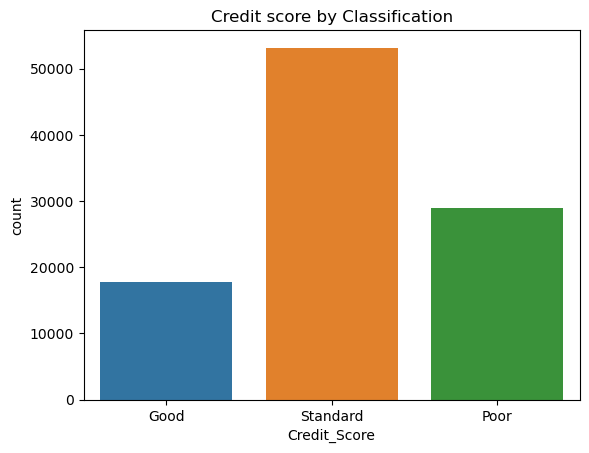

In [51]:
# to plot a count plot of the target variable 'Credit_Score'
sns.countplot(data=df, x='Credit_Score')
plt.title('Credit score by Classification');

In [52]:
# this no class imbalanced of target variable in the categories
pd.DataFrame(df['Credit_Score'].value_counts())

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


In [53]:
df['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [54]:
# to remove '_' from column and convert it into integer
df['Age'] = df['Age'].str.replace("_","")

In [55]:
df['Age'] = df['Age'].astype('int')

In [56]:
df['Age'].describe()

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

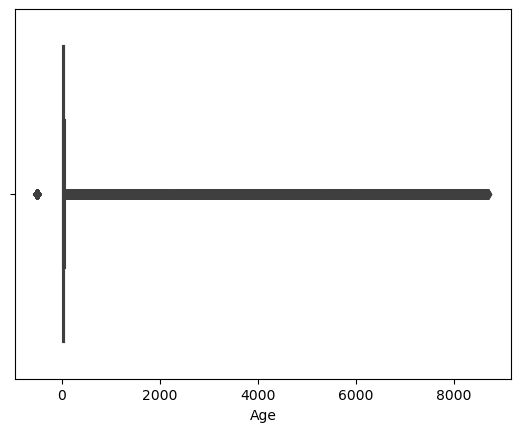

In [57]:
# 'Age' has many outlier values, it starts from -500, ends at 8698, there are too many erronous data in 'Age' column
sns.boxplot(data=df, x='Age');

In [58]:
# to remove the outlier values in 'age' using the interquartile range method
# First quartile
Q1_25 = df['Age'].quantile(0.25)
Q1_25

24.0

In [59]:
# 3rd quartile
Q3_75 = df['Age'].quantile(0.75)
Q3_75

42.0

In [60]:
# interquartile range for 'Age', IQR
IQR = Q3_75 - Q1_25
IQR

18.0

In [61]:
# 'Age' upper limits
age_upper_limit = 42 + 1.5 *18
age_upper_limit

69.0

In [62]:
# 'Age' lower limits
age_lower_limit = 24 - 1.5*18
age_lower_limit 

-3.0

In [63]:
# finding upper limit outliers, 'Age'
age_upper_array = df[df['Age'] > age_upper_limit]

In [64]:
# finding lower limit outliers,'Age'
age_lower_array = df[df['Age'] > age_lower_limit]

In [65]:
# to remove outliers in 'Age' columns
df = df[(df['Age'] < age_upper_limit) & (df['Age'] > age_lower_limit)]
df.shape

(97219, 24)

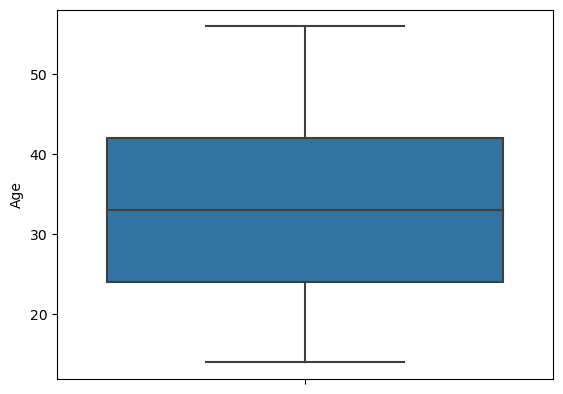

In [66]:
# to see if the outliers in 'age' have been removed, all outlier values in 'age' have been removed
sns.boxplot(data=df, y='Age');

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97219 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     97219 non-null  object 
 1   Age                       97219 non-null  int32  
 2   Occupation                97219 non-null  object 
 3   Annual_Income             97219 non-null  float64
 4   Monthly_Inhand_Salary     82623 non-null  float64
 5   Num_Bank_Accounts         97219 non-null  int64  
 6   Num_Credit_Card           97219 non-null  int64  
 7   Interest_Rate             97219 non-null  int64  
 8   Num_of_Loan               97219 non-null  int32  
 9   Type_of_Loan              86145 non-null  object 
 10  Delay_from_due_date       97219 non-null  int64  
 11  Num_of_Delayed_Payment    90395 non-null  float64
 12  Changed_Credit_Limit      95183 non-null  float64
 13  Num_Credit_Inquiries      95313 non-null  float64
 14  Credit_Mix 

In [68]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      24838
High_spent_Medium_value_payments    17040
Low_spent_Medium_value_payments     13475
High_spent_Large_value_payments     13331
High_spent_Small_value_payments     11032
Low_spent_Large_value_payments      10127
np.nan                               7376
Name: count, dtype: int64

In [69]:
# to remove 'np.nan' from column
df = df[df['Payment_Behaviour'] != 'np.nan']

In [70]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [71]:
100*df.isnull().sum()/len(df)

Month                        0.000000
Age                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       14.998386
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.358704
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       6.964371
Changed_Credit_Limit         2.103670
Num_Credit_Inquiries         1.947842
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.462229
Payment_Behaviour            0.000000
Monthly_Balance              2.869450
Credit_Score                 0.000000
credit_history_age_float     9.039102
dtype: float64

In [72]:
# to select out the numeric variables
df.select_dtypes(['int','float'])

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,credit_history_age_float
0,23,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,22.08
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162,NaN
3,23,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,22.33
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,22.42
6,23,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,4.0,809.98,22.537593,49.574949,178.344067,244.565317,22.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.99,3359.415833,4,6,7,2,20,6.0,9.50,3.0,502.38,39.323569,35.104023,140.581403,NaN,31.42
99995,25,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,NaN,31.50
99996,25,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,NaN,31.58
99997,25,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,NaN,31.67


In [82]:
# to see the correlation of all numeric variables
df.select_dtypes(['int','float']).corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,credit_history_age_float
Age,1.000000,0.006499,0.091339,-0.000637,-0.006311,-0.002427,-0.007798,-0.173361,0.001588,-0.155902,-0.006465,-0.201689,0.024658,0.000579,0.005865,-0.001770,0.233988
Annual_Income,0.006499,1.000000,0.029095,-0.004190,0.001734,-0.005250,-0.003580,-0.009113,0.001979,0.000097,0.000619,-0.003136,0.010008,-0.002162,-0.005837,0.000868,-0.002442
Monthly_Inhand_Salary,0.091339,0.029095,1.000000,-0.012451,-0.004492,-0.007114,-0.008296,-0.249458,0.000956,-0.174964,-0.010100,-0.269907,0.172703,0.007792,0.062194,-0.000877,0.273543
Num_Bank_Accounts,-0.000637,-0.004190,-0.012451,1.000000,-0.001701,-0.003733,0.000088,0.015969,-0.003540,0.007802,-0.002208,0.016884,-0.000533,-0.001577,0.003507,0.001134,-0.011377
Num_Credit_Card,-0.006311,0.001734,-0.004492,-0.001701,1.000000,-0.003599,0.000988,0.009126,0.004840,0.005213,-0.004035,0.005578,-0.004747,0.002237,-0.001536,0.001357,-0.005327
Interest_Rate,-0.002427,-0.005250,-0.007114,-0.003733,-0.003599,1.000000,-0.001569,0.011251,0.003216,0.001972,-0.000708,0.011760,-0.002593,0.001284,0.000691,0.001333,-0.010653
Num_of_Loan,-0.007798,-0.003580,-0.008296,0.000088,0.000988,-0.001569,1.000000,0.013573,0.011748,0.016190,-0.002353,0.025287,-0.003523,0.002948,-0.002178,-0.000067,-0.024661
Delay_from_due_date,-0.173361,-0.009113,-0.249458,0.015969,0.009126,0.011251,0.013573,1.000000,0.010998,0.292784,0.011818,0.571574,-0.064606,-0.005660,-0.012643,0.004732,-0.490758
Num_of_Delayed_Payment,0.001588,0.001979,0.000956,-0.003540,0.004840,0.003216,0.011748,0.010998,1.000000,0.006443,0.002241,0.009098,-0.001500,0.001003,0.001399,0.000991,-0.007422
Changed_Credit_Limit,-0.155902,0.000097,-0.174964,0.007802,0.005213,0.001972,0.016190,0.292784,0.006443,1.000000,0.005186,0.459585,-0.047938,-0.002599,-0.011219,-0.002307,-0.423983


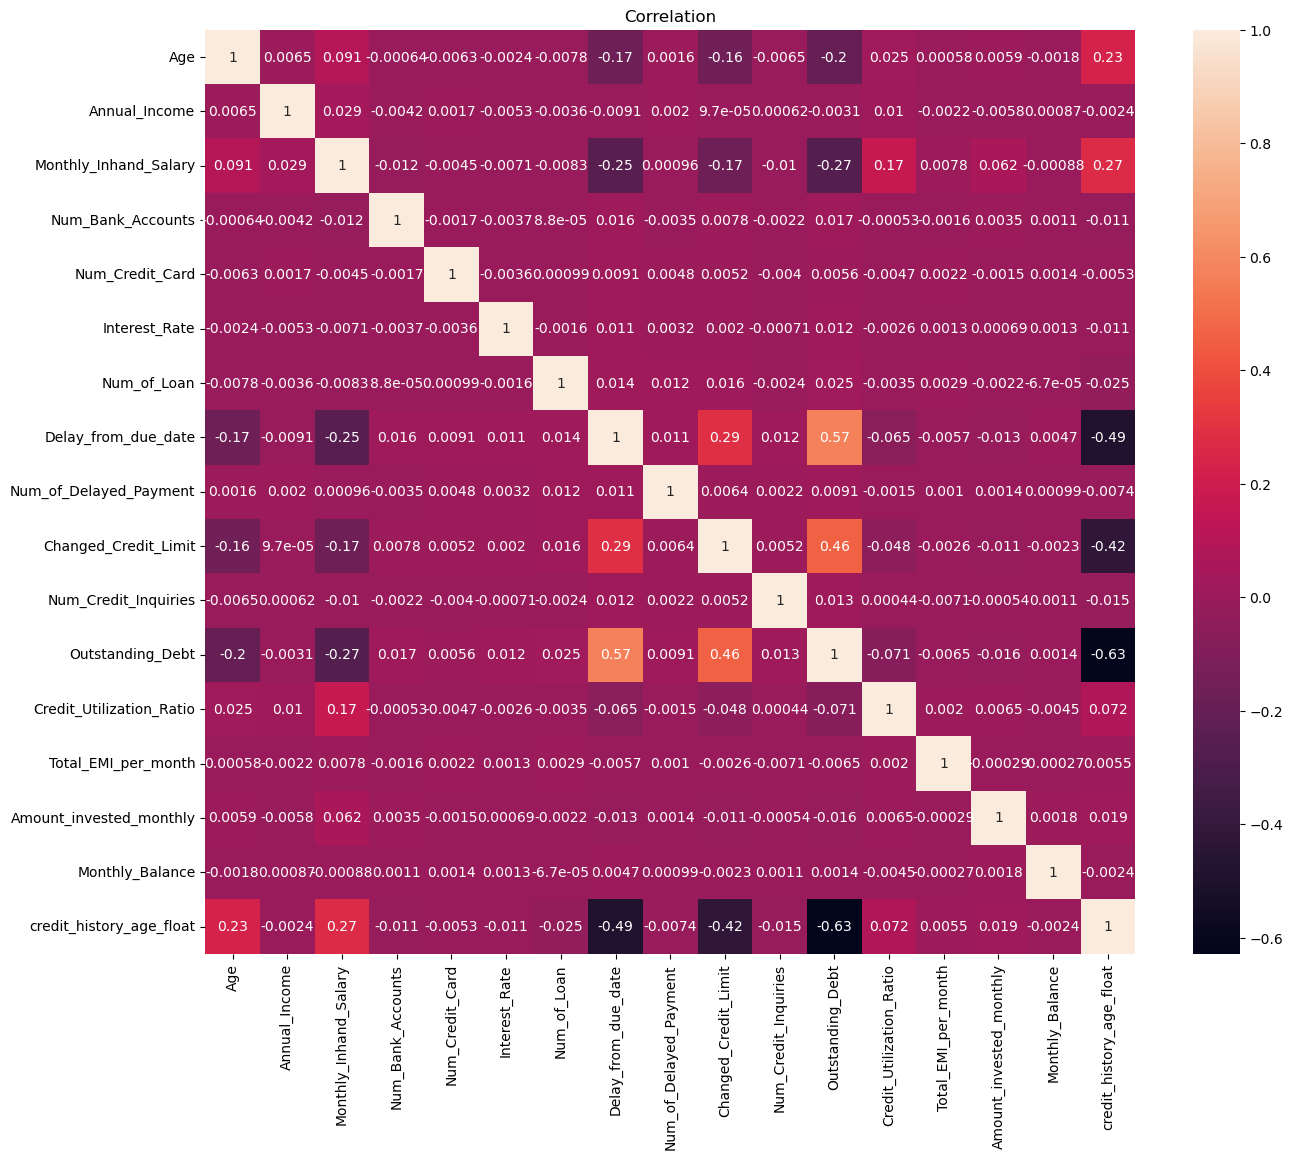

In [73]:
# to visualise all correlation of numeric variables in a heatmap
plt.figure(figsize=(15,12), dpi=100)
sns.heatmap(data=df.select_dtypes(['int','float']).corr(), annot=True)
plt.title('Correlation');

In [74]:
# to view categorical variables in dataset
df.select_dtypes('object')

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,No,High_spent_Small_value_payments,Good
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
6,July,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
...,...,...,...,...,...,...,...
99994,March,Mechanic,"Auto Loan, and Student Loan",_,No,High_spent_Medium_value_payments,Poor
99995,April,Mechanic,"Auto Loan, and Student Loan",_,No,High_spent_Large_value_payments,Poor
99996,May,Mechanic,"Auto Loan, and Student Loan",_,No,High_spent_Medium_value_payments,Poor
99997,June,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor


In [75]:
df['Age'].describe()

count    89843.000000
mean        33.327827
std         10.767608
min         14.000000
25%         24.000000
50%         33.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

In [76]:
# to separate age range into different categories, using a def custom function
def age_categories(s):
    if 14 <= s <= 24:
        return "14 to 24"
    if 25 <= s <= 35:
        return "25 to 35"
    if 36 <= s <= 46:
        return "36 to 46"
    if 47 <= s:
        return "above 47"

In [77]:
# to .apply() a custom function
df['age_categories'] = df['Age'].apply(age_categories)

In [78]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,credit_history_age_float,age_categories
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22.08,14 to 24
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,NaN,14 to 24
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22.33,14 to 24
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22.42,14 to 24
6,July,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,22.58,14 to 24


In [79]:
df['age_categories'].unique()

array(['14 to 24', '25 to 35', 'above 47', '36 to 46'], dtype=object)

In [80]:
age_categories_order =['14 to 24',
                       '25 to 35',
                       '36 to 46',
                       'above 47']

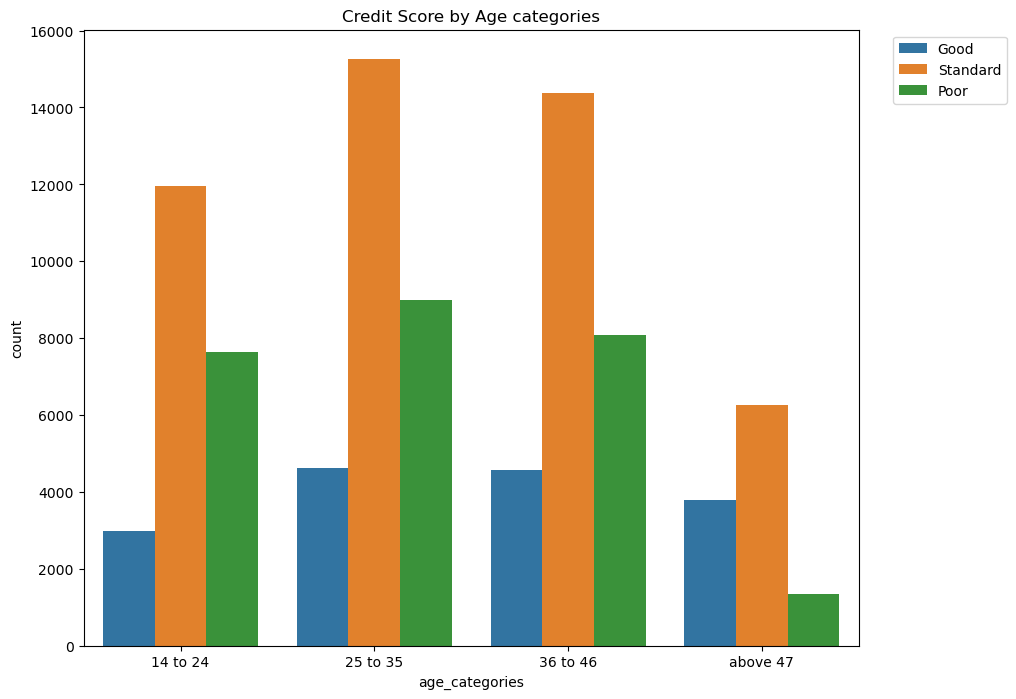

In [81]:
# to see credit score by different age group
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='age_categories', order = age_categories_order,  hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Credit Score by Age categories');

In [82]:
# customers aged 25 to 35 years has the best credit score, followed by '36 to 46'
pd.DataFrame(df.groupby(['age_categories','Credit_Score'])['Credit_Score'].count())

Credit_Score
age_categories Credit_Score              
14 to 24       Good                  2991
               Poor                  7648
               Standard             11944
25 to 35       Good                  4609
               Poor                  8992
               Standard             15262
36 to 46       Good                  4561
               Poor                  8067
               Standard             14378
above 47       Good                  3786
               Poor                  1339
               Standard              6266

In [83]:
df['Occupation'].value_counts()

Occupation
_______          6371
Lawyer           5904
Architect        5732
Engineer         5698
Accountant       5644
Mechanic         5632
Scientist        5625
Teacher          5617
Entrepreneur     5596
Media_Manager    5588
Developer        5541
Doctor           5463
Journalist       5459
Manager          5362
Musician         5338
Writer           5273
Name: count, dtype: int64

In [84]:
# Occupation has '_______', to remove _____ from the column
df['Occupation'] = df['Occupation'].str.replace('_______','unknown')

In [85]:
df['Occupation'].value_counts()

Occupation
unknown          6371
Lawyer           5904
Architect        5732
Engineer         5698
Accountant       5644
Mechanic         5632
Scientist        5625
Teacher          5617
Entrepreneur     5596
Media_Manager    5588
Developer        5541
Doctor           5463
Journalist       5459
Manager          5362
Musician         5338
Writer           5273
Name: count, dtype: int64

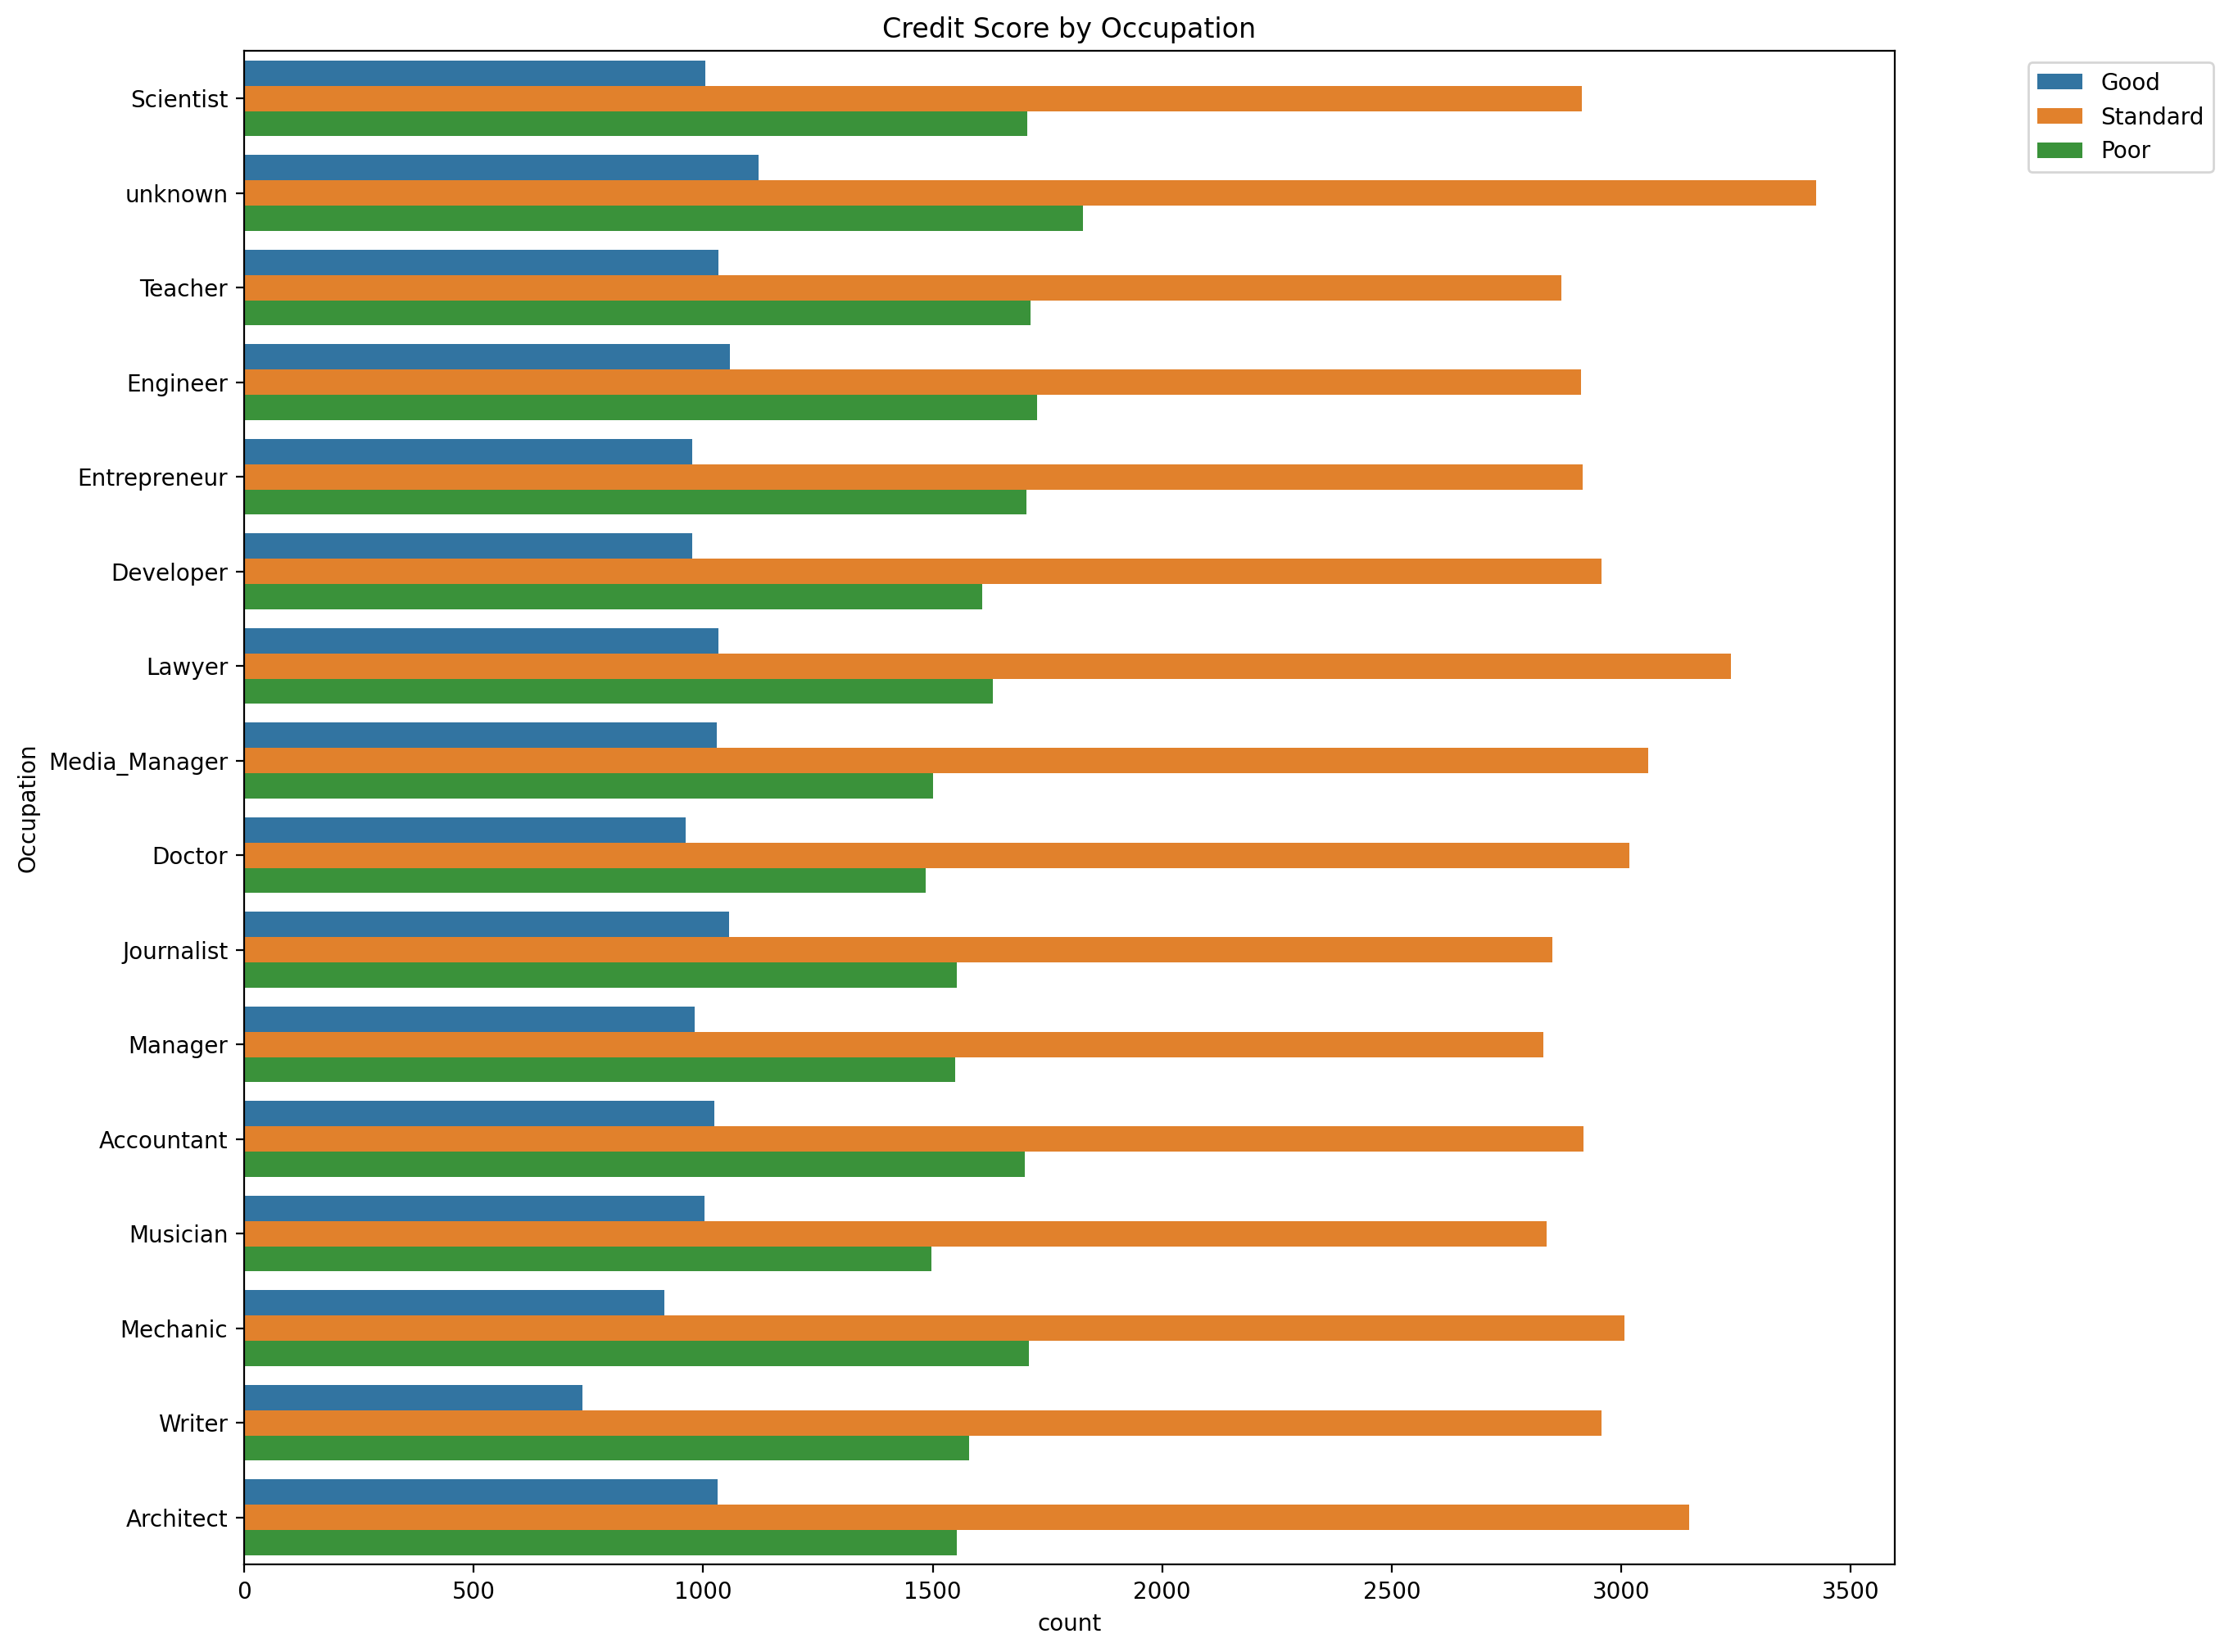

In [86]:
# it is observed that 'Teacher' have 'Good' credit score
plt.figure(figsize=(13,12), dpi=200)
sns.countplot(data=df, y='Occupation', hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Credit Score by Occupation');

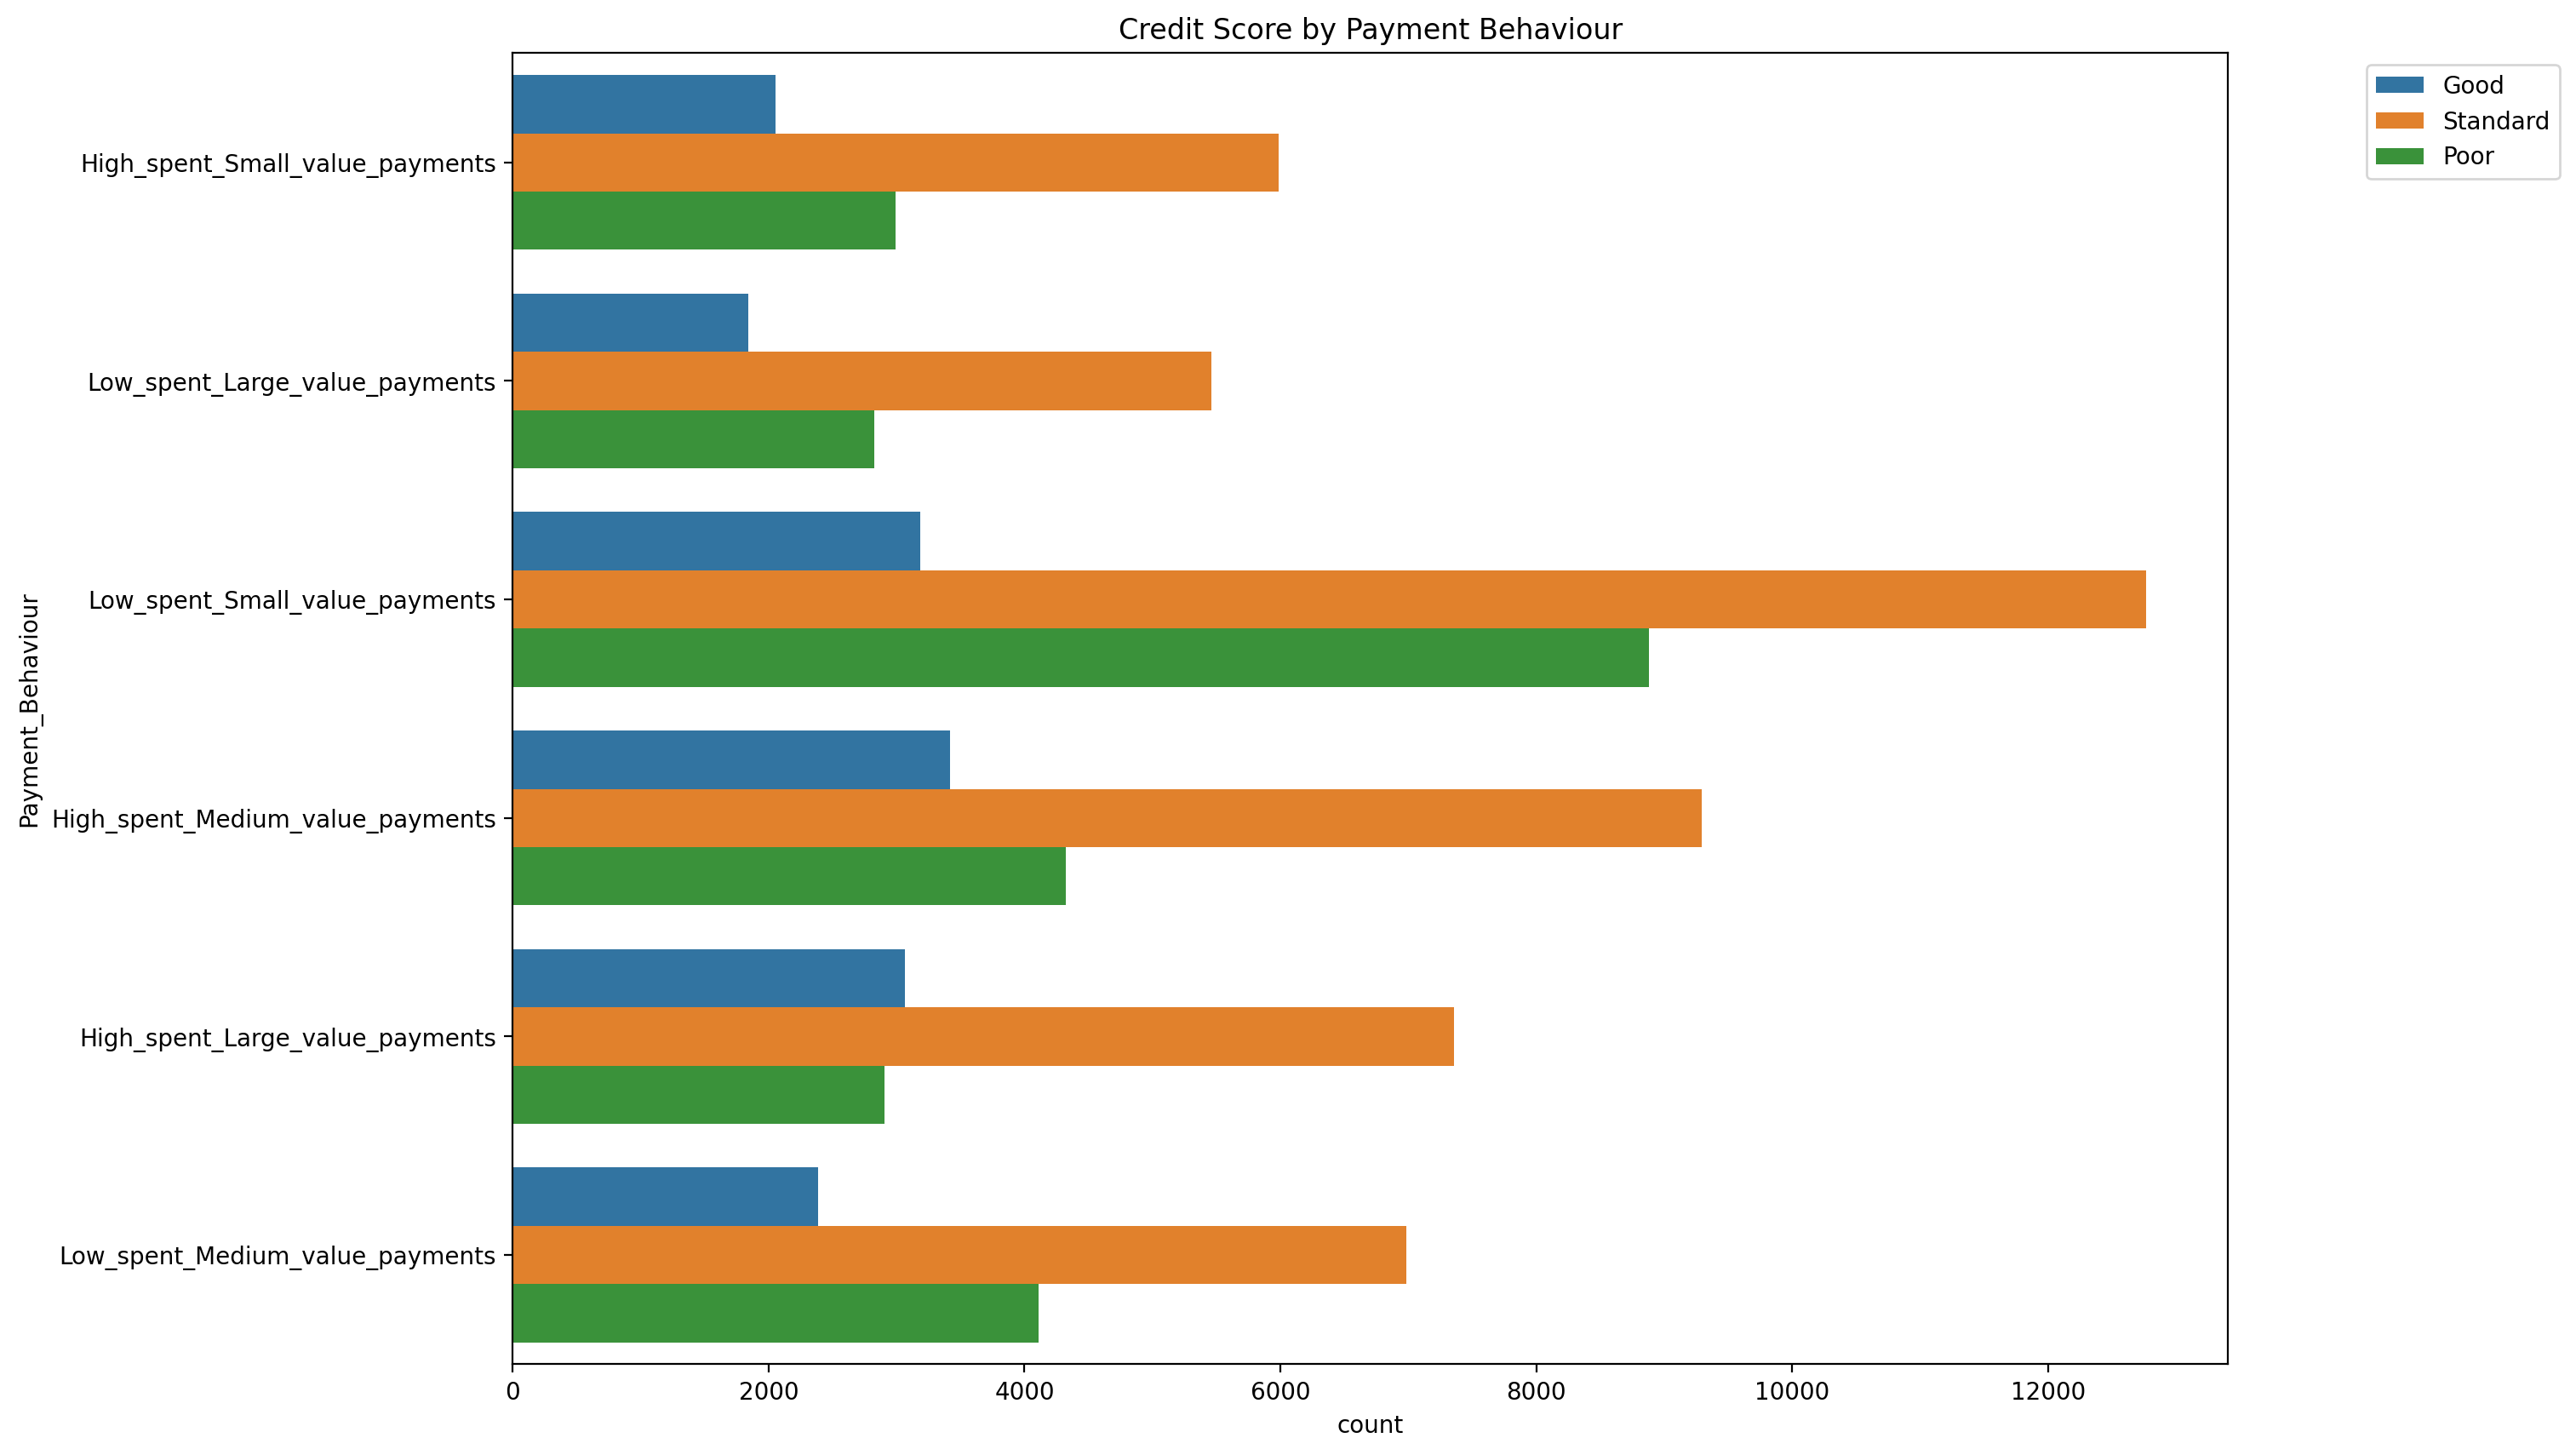

In [87]:
plt.figure(figsize=(13,10), dpi=200)
sns.countplot(data=df, y='Payment_Behaviour', hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Credit Score by Payment Behaviour');

In [88]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    32827
Good        21825
_           18165
Bad         17026
Name: count, dtype: int64

In [89]:
# to replace '_' as unknown
df['Credit_Mix'] = df['Credit_Mix'].str.replace("_", 'unknown')

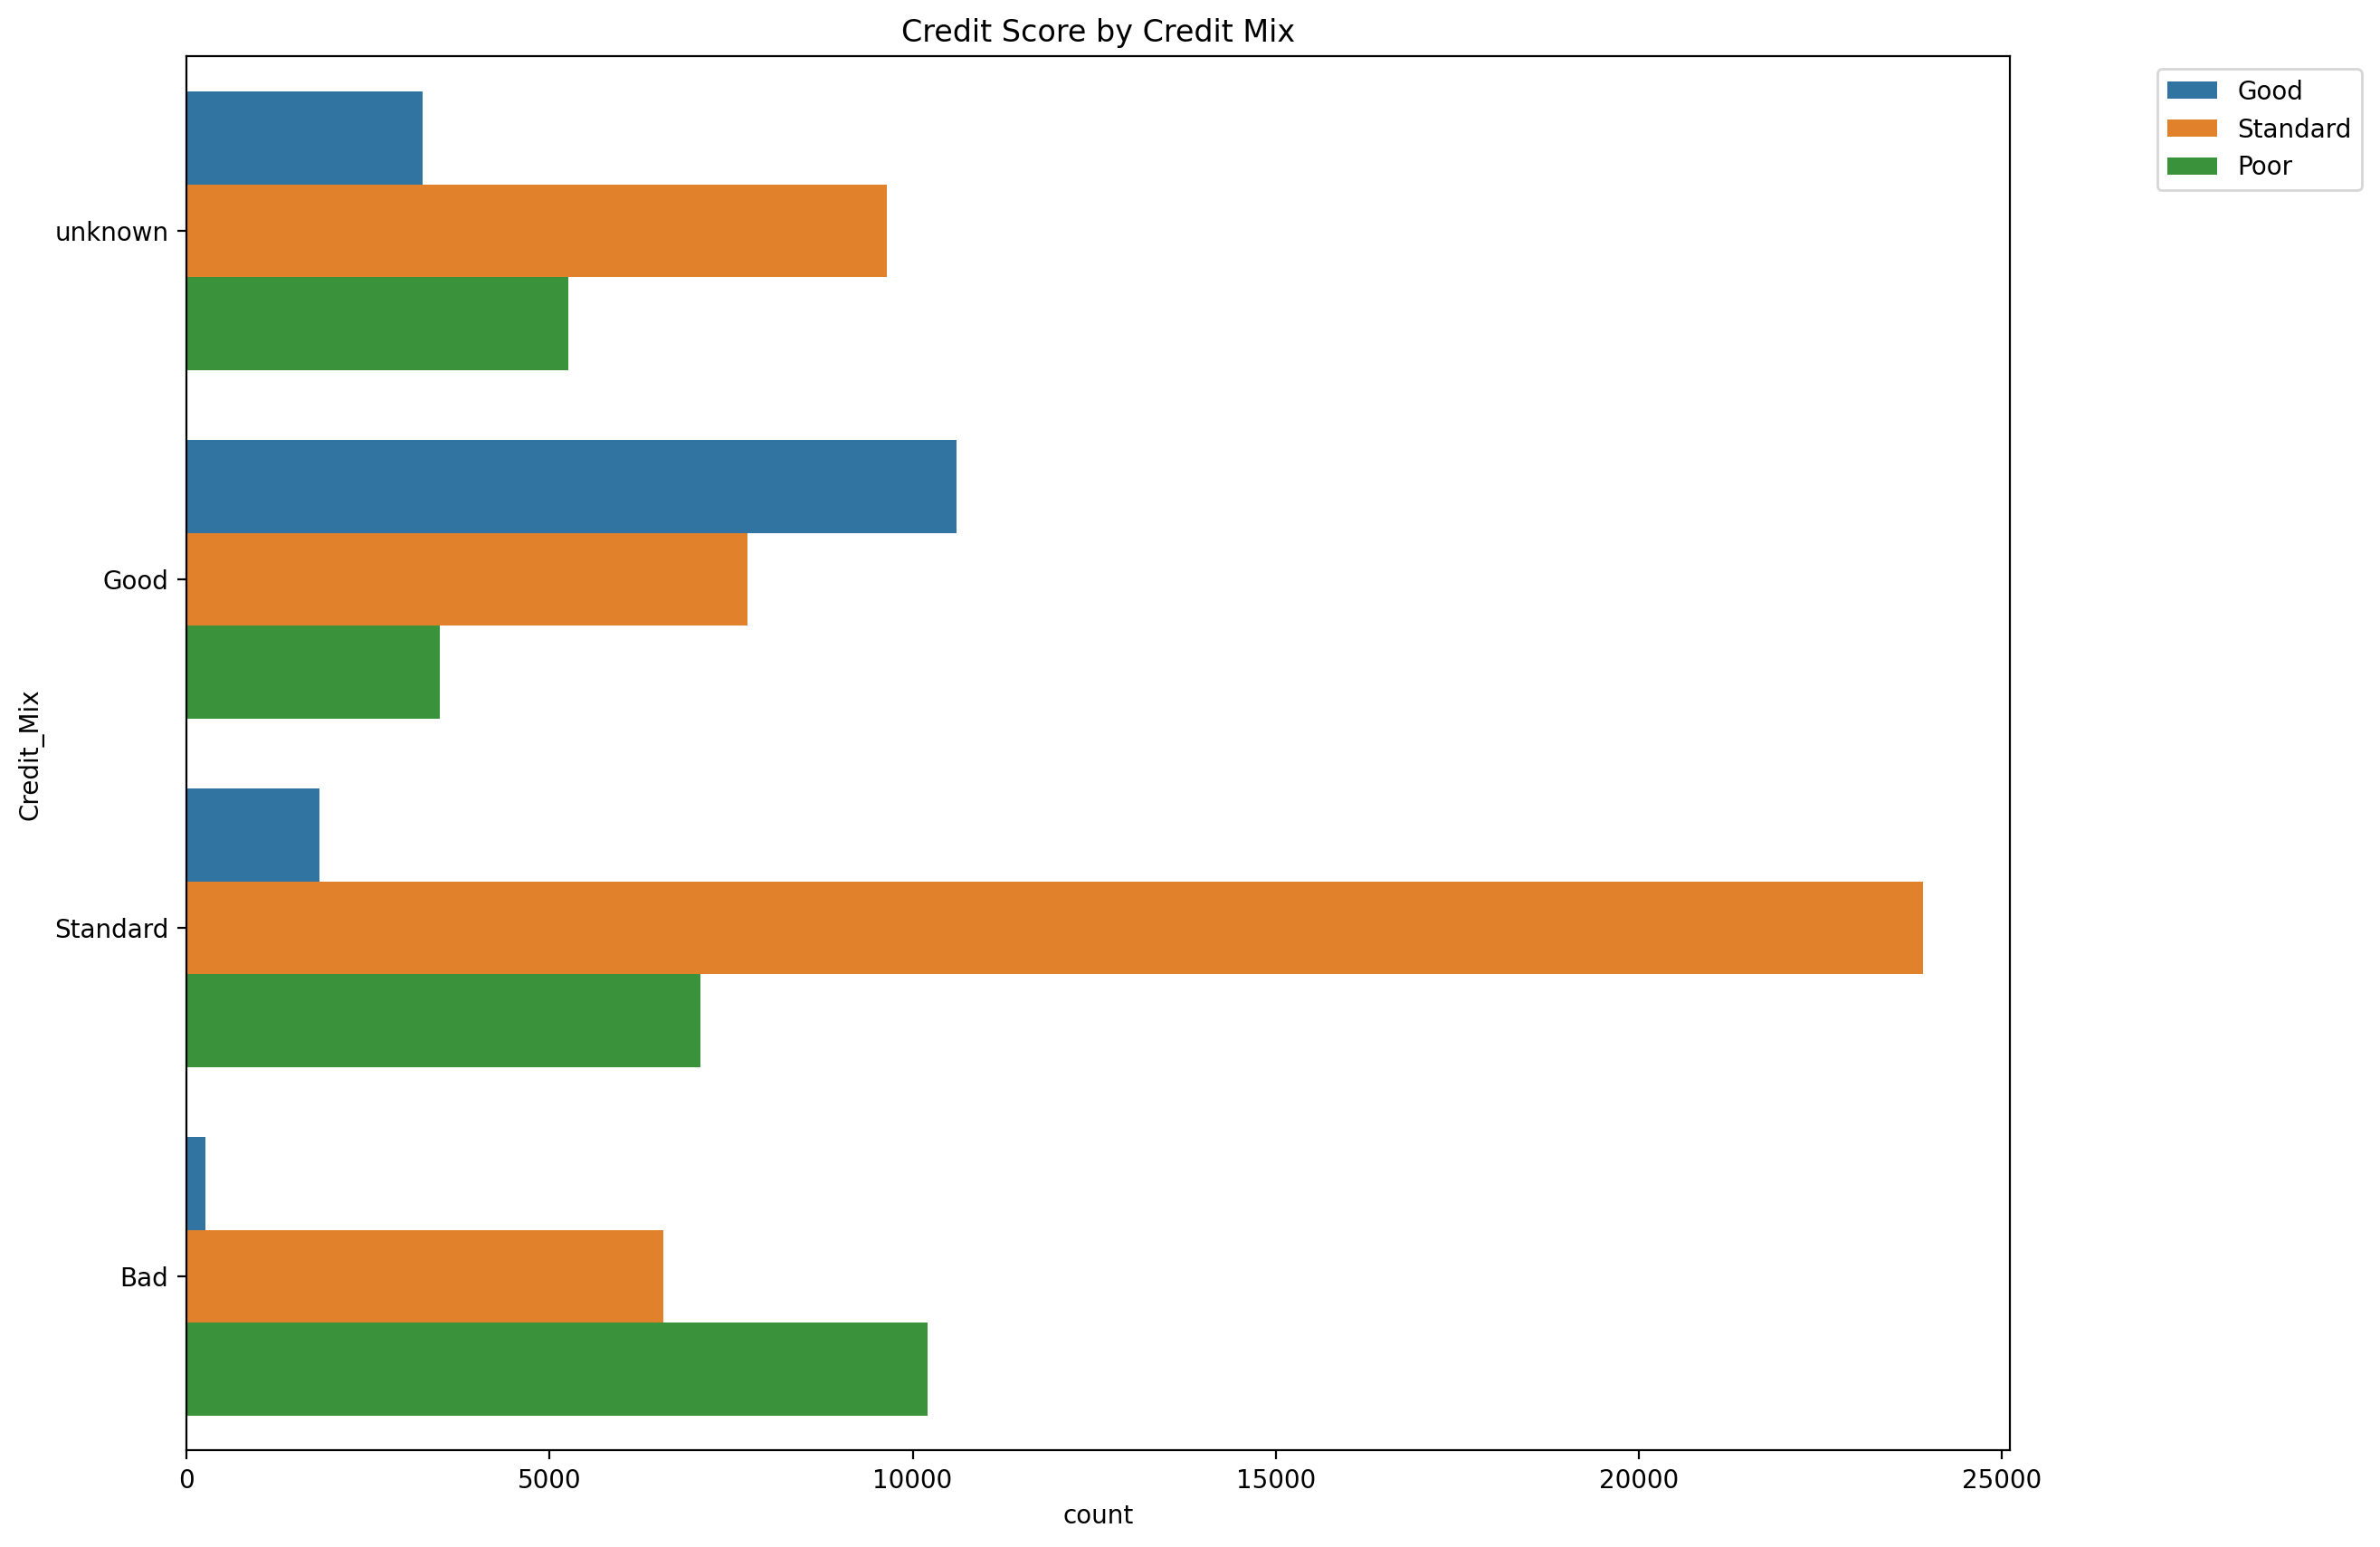

In [90]:
plt.figure(figsize=(13,10), dpi=200)
sns.countplot(data=df, y='Credit_Mix', hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Credit Score by Credit Mix');

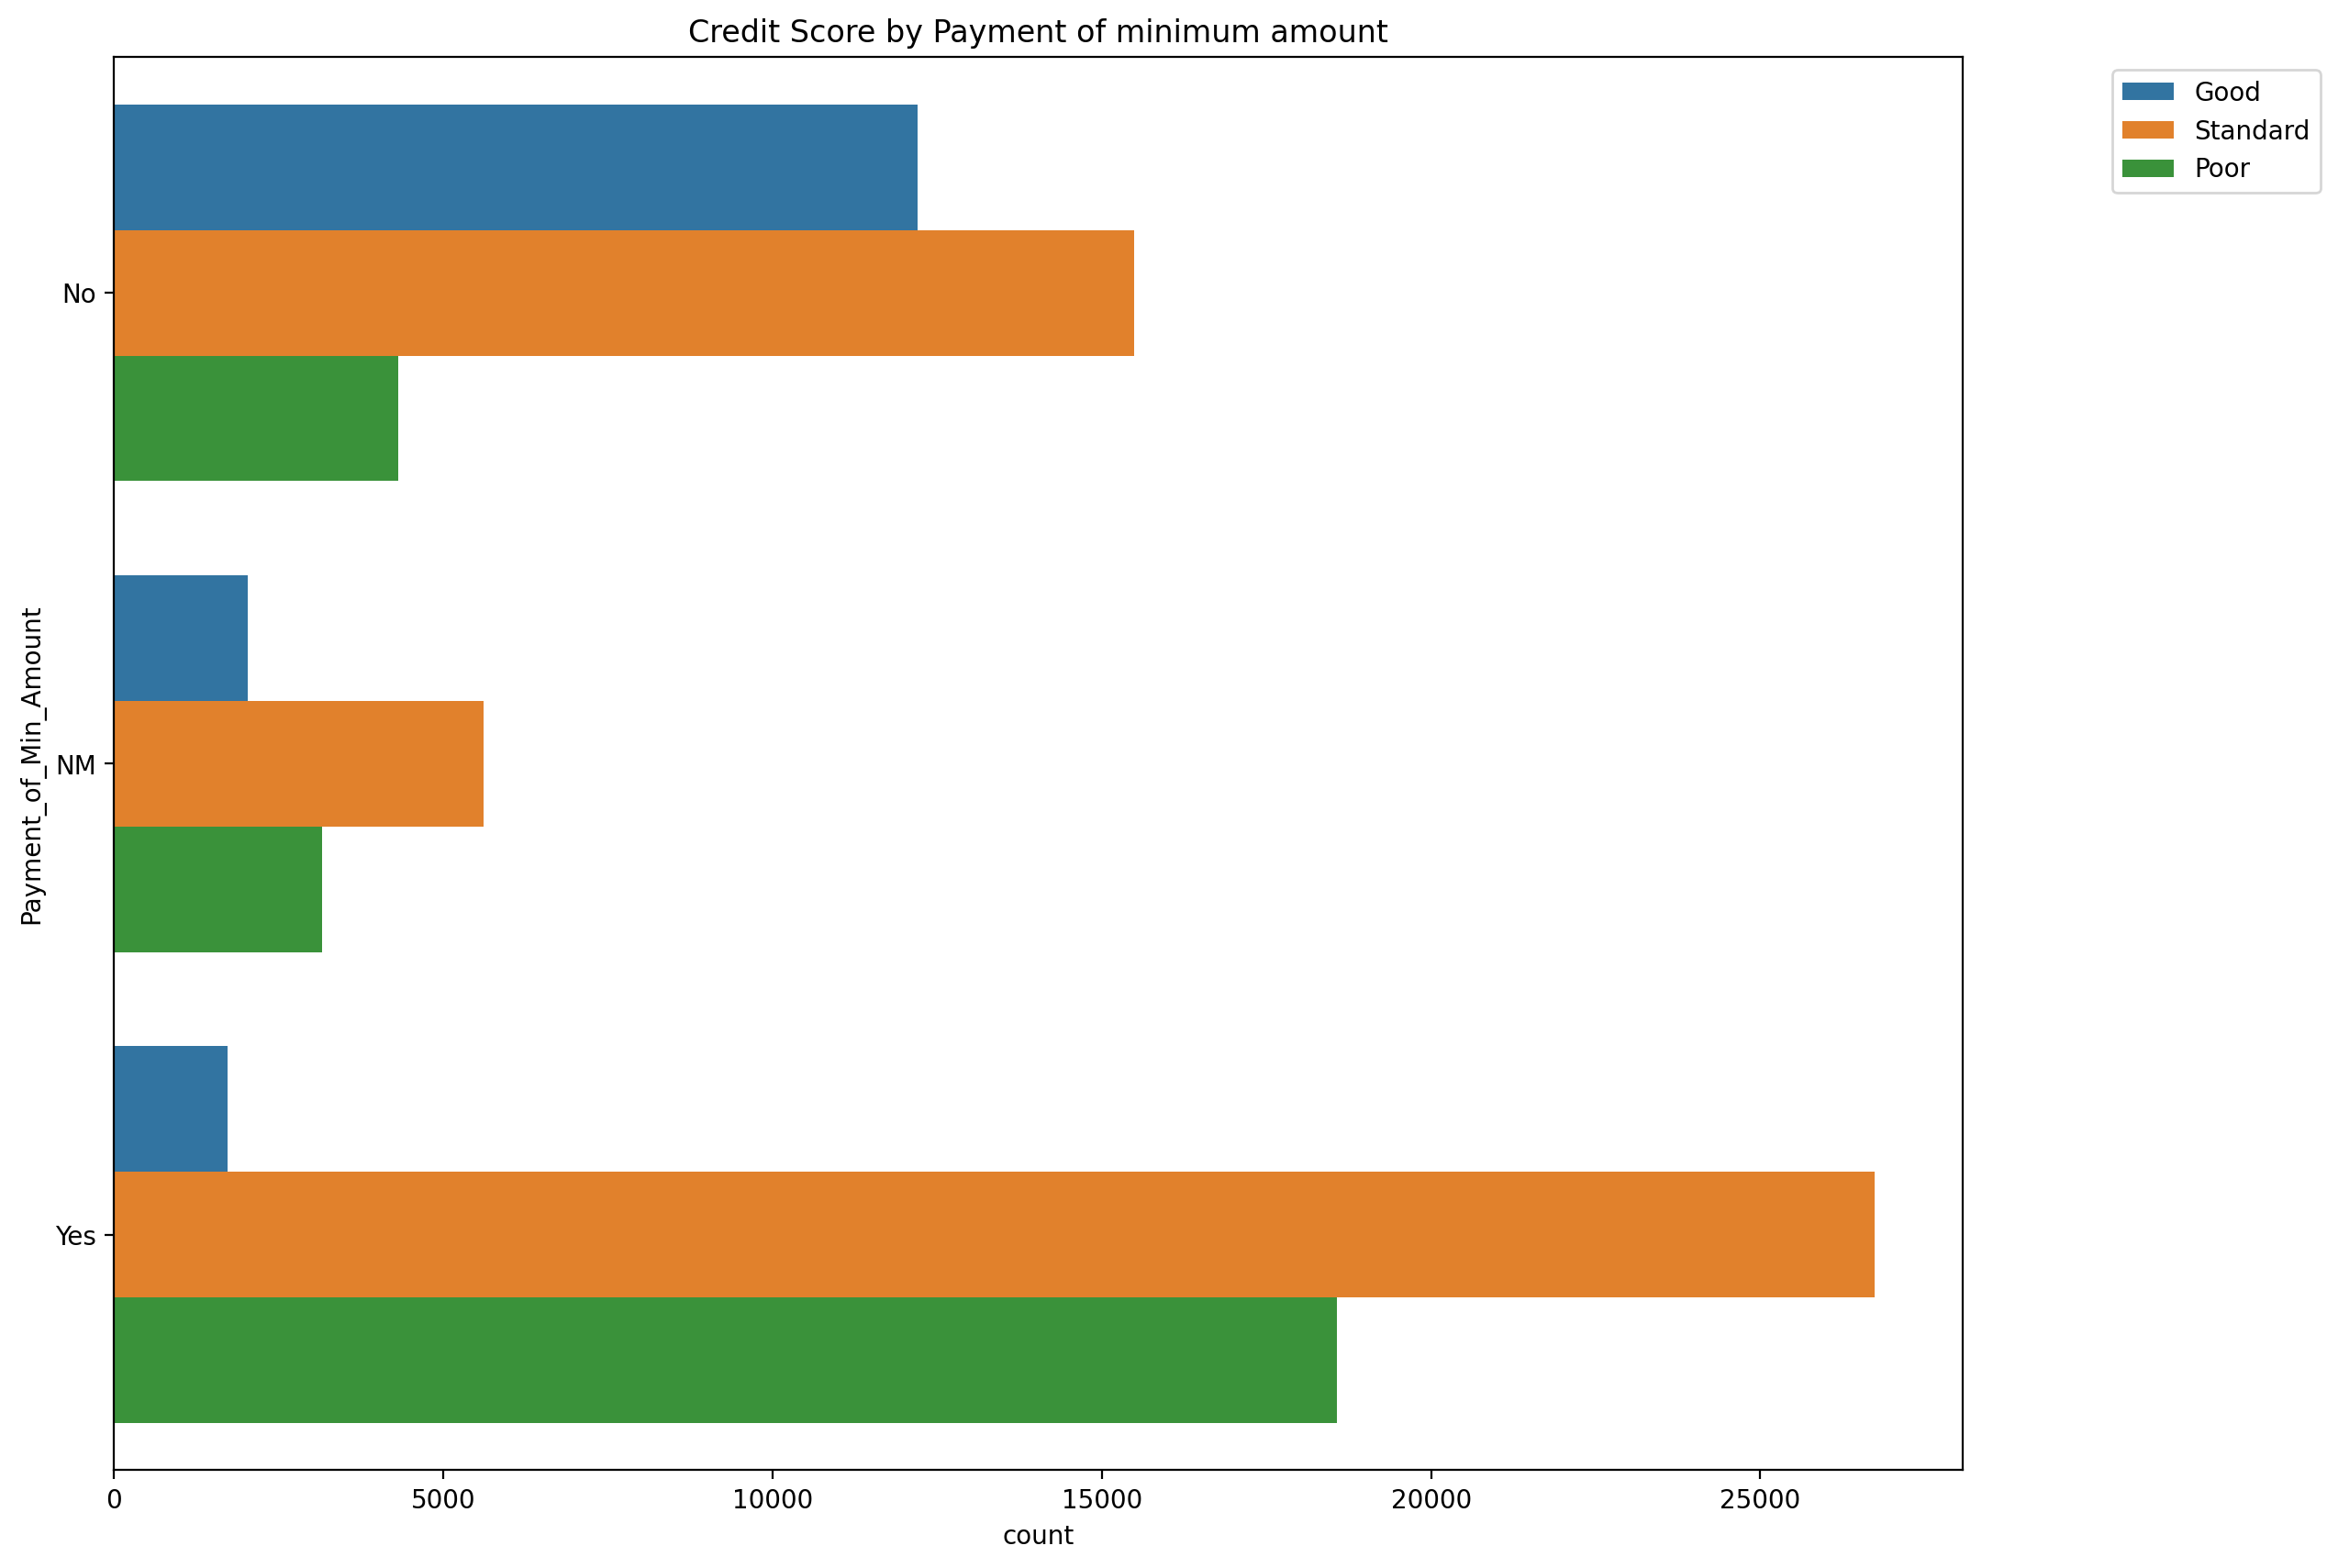

In [91]:
plt.figure(figsize=(13,10), dpi=200)
sns.countplot(data=df, y='Payment_of_Min_Amount', hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Credit Score by Payment of minimum amount');

In [94]:
df['Outstanding_Debt'].unique()

array([ 809.98,  605.03, 1303.01, ...,  620.64, 3571.7 ,  502.38])

In [96]:
# to groupby 'Outstanding_Debt' by Credit score
df.groupby('Credit_Score')['Outstanding_Debt'].describe()

,count,mean,std,min,25%,50%,75%,max
Credit_Score,,,,,,,,
Good,15947.0,801.493233,611.450306,0.23,382.17,736.18,1150.03,4998.07
Poor,26046.0,2078.368718,1143.346426,0.54,1334.81,1941.93,2597.91,4997.10
Standard,47850.0,1278.621651,1133.389000,0.23,489.94,1001.61,1453.95,4998.07


In [ ]:
# for customers with 'Good', credit score, the average debt is $801
# for customers with 'Poor' credit score, the average debt is $2078

In [97]:
pd.DataFrame(df['Type_of_Loan'].value_counts())

,count
Type_of_Loan,
Not Specified,1276
Credit-Builder Loan,1155
Debt Consolidation Loan,1133
Student Loan,1128
Personal Loan,1128
...,...
"Personal Loan, Auto Loan, Payday Loan, Student Loan, Auto Loan, Home Equity Loan, and Credit-Builder Loan",4
"Credit-Builder Loan, Personal Loan, Payday Loan, and Student Loan",4
"Student Loan, Personal Loan, Student Loan, and Personal Loan",3


In [98]:
# to remove 'Age' for machine learning purpose
df = df.drop('age_categories', axis=1)

In [99]:
100*df.isnull().sum()/len(df)

Month                        0.000000
Age                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       14.998386
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.358704
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       6.964371
Changed_Credit_Limit         2.103670
Num_Credit_Inquiries         1.947842
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.462229
Payment_Behaviour            0.000000
Monthly_Balance              2.869450
Credit_Score                 0.000000
credit_history_age_float     9.039102
dtype: float64

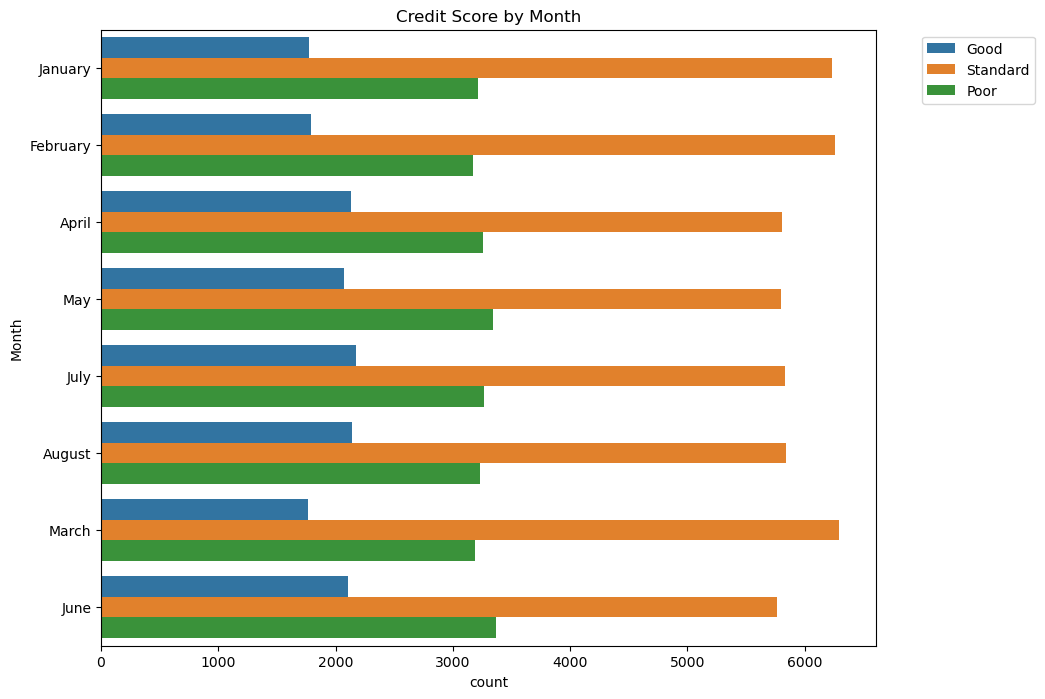

In [100]:
# it is observed that July has the highest 'Good' credit score of all month, 
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, y='Month', hue='Credit_Score')
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.title('Credit Score by Month');

In [101]:
# to remove all missing values from dataset
df = df.dropna()

In [102]:
# to check if the variables are in the correct data types for the last time
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51065 entries, 0 to 98303
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     51065 non-null  object 
 1   Age                       51065 non-null  int32  
 2   Occupation                51065 non-null  object 
 3   Annual_Income             51065 non-null  float64
 4   Monthly_Inhand_Salary     51065 non-null  float64
 5   Num_Bank_Accounts         51065 non-null  int64  
 6   Num_Credit_Card           51065 non-null  int64  
 7   Interest_Rate             51065 non-null  int64  
 8   Num_of_Loan               51065 non-null  int32  
 9   Type_of_Loan              51065 non-null  object 
 10  Delay_from_due_date       51065 non-null  int64  
 11  Num_of_Delayed_Payment    51065 non-null  float64
 12  Changed_Credit_Limit      51065 non-null  float64
 13  Num_Credit_Inquiries      51065 non-null  float64
 14  Credit_Mix 

In [103]:
# to define X and y to prepare for machine learning algorithm
X = df.drop('Credit_Score', axis=1)

In [104]:
# to convert 'object' to dummy variables before ML algorithm, drop_first=True removes the first column to prevent multicollinearity
X = pd.get_dummies(X, drop_first=True)

In [105]:
y = df['Credit_Score']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
# testing data = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [109]:
scaler = StandardScaler()

In [110]:
scaled_X_train = scaler.fit_transform(X_train)

In [111]:
scaled_X_test = scaler.transform(X_test)

In [112]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
rf = RandomForestClassifier()

In [115]:
rf.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [116]:
# to predict on the scaled_X_test data
rf_pred = rf.predict(scaled_X_test)

In [117]:
rf_pred 

array(['Poor', 'Standard', 'Standard', ..., 'Standard', 'Poor', 'Poor'],
      dtype=object)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [120]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred)) # the Random Forest Classifier model = 77% accurate

[[1089    8  528]
 [  95 2427  652]
 [ 394  670 4350]]


              precision    recall  f1-score   support

        Good       0.69      0.67      0.68      1625
        Poor       0.78      0.76      0.77      3174
    Standard       0.79      0.80      0.79      5414

    accuracy                           0.77     10213
   macro avg       0.75      0.75      0.75     10213
weighted avg       0.77      0.77      0.77     10213



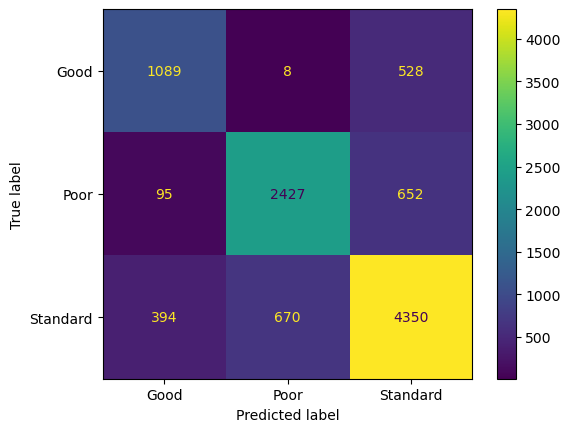

In [121]:
ConfusionMatrixDisplay.from_predictions(y_test,rf_pred)

In [122]:
ada = AdaBoostClassifier()

In [123]:
ada.fit(scaled_X_train,y_train)

AdaBoostClassifier()

In [124]:
# to predict on the scaled_X_test data
ada_pred = ada.predict(scaled_X_test)

In [125]:
print(confusion_matrix(y_test,ada_pred))
print('\n')
print(classification_report(y_test,ada_pred)) # Accuracy rate of AdaBoost classifer model = 65%

[[ 798   30  797]
 [ 199 1861 1114]
 [ 552  858 4004]]


              precision    recall  f1-score   support

        Good       0.52      0.49      0.50      1625
        Poor       0.68      0.59      0.63      3174
    Standard       0.68      0.74      0.71      5414

    accuracy                           0.65     10213
   macro avg       0.62      0.61      0.61     10213
weighted avg       0.65      0.65      0.65     10213



In [126]:
gb = GradientBoostingClassifier()

In [127]:
gb.fit(scaled_X_train,y_train)

GradientBoostingClassifier()

In [128]:
gb_pred = gb.predict(scaled_X_test)

In [129]:
print(confusion_matrix(y_test,gb_pred))
print('\n')
print(classification_report(y_test,gb_pred)) # Accuracy rate of Gradient Boost classifier = 70%

[[ 933   23  669]
 [ 148 2152  874]
 [ 556  749 4109]]


              precision    recall  f1-score   support

        Good       0.57      0.57      0.57      1625
        Poor       0.74      0.68      0.71      3174
    Standard       0.73      0.76      0.74      5414

    accuracy                           0.70     10213
   macro avg       0.68      0.67      0.67     10213
weighted avg       0.70      0.70      0.70     10213



In [130]:
dt = DecisionTreeClassifier()

In [131]:
dt.fit(scaled_X_train,y_train)

DecisionTreeClassifier()

In [132]:
dt_pred = dt.predict(scaled_X_test)

In [133]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred)) # Accuracy rate for Decision Tree classifier = 72%

[[ 999   90  536]
 [  84 2252  838]
 [ 533  829 4052]]


              precision    recall  f1-score   support

        Good       0.62      0.61      0.62      1625
        Poor       0.71      0.71      0.71      3174
    Standard       0.75      0.75      0.75      5414

    accuracy                           0.72     10213
   macro avg       0.69      0.69      0.69     10213
weighted avg       0.71      0.72      0.72     10213



In [134]:
rf_importances = rf.feature_importances_

In [135]:
X.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       ...
       'Credit_Mix_Good', 'Credit_Mix_Standard', 'Credit_Mix_unknown',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dtype='object', length=6217)

In [136]:
# to print a dataframe of variable importance
rf_importances = pd.DataFrame(data = rf_importances, index=X.columns, columns=['Importance'])

In [137]:
rf_importances.sort_values('Importance', ascending=False)

,Importance
Outstanding_Debt,0.068095
Interest_Rate,0.061456
credit_history_age_float,0.046502
Delay_from_due_date,0.045298
Changed_Credit_Limit,0.041781
...,...
"Type_of_Loan_Credit-Builder Loan, Debt Consolidation Loan, Home Equity Loan, Auto Loan, Payday Loan, Home Equity Loan, Debt Consolidation Loan, Home Equity Loan, and Payday Loan",0.000000
"Type_of_Loan_Auto Loan, Credit-Builder Loan, Payday Loan, and Home Equity Loan",0.000000
"Type_of_Loan_Home Equity Loan, Debt Consolidation Loan, Credit-Builder Loan, Credit-Builder Loan, and Student Loan",0.000000
"Type_of_Loan_Credit-Builder Loan, Payday Loan, Home Equity Loan, Auto Loan, Payday Loan, and Home Equity Loan",0.000000


In [138]:
rf_imp = rf_importances.sort_values('Importance', ascending=False)

In [139]:
# to filter out 'Importances' less than 0.02
rf_imp = rf_imp[rf_imp['Importance'] > 0.02]

In [140]:
rf_imp

,Importance
Outstanding_Debt,0.068095
Interest_Rate,0.061456
credit_history_age_float,0.046502
Delay_from_due_date,0.045298
Changed_Credit_Limit,0.041781
Num_Credit_Inquiries,0.037245
Num_of_Delayed_Payment,0.035209
Annual_Income,0.033254
Amount_invested_monthly,0.033120
Num_Credit_Card,0.032909


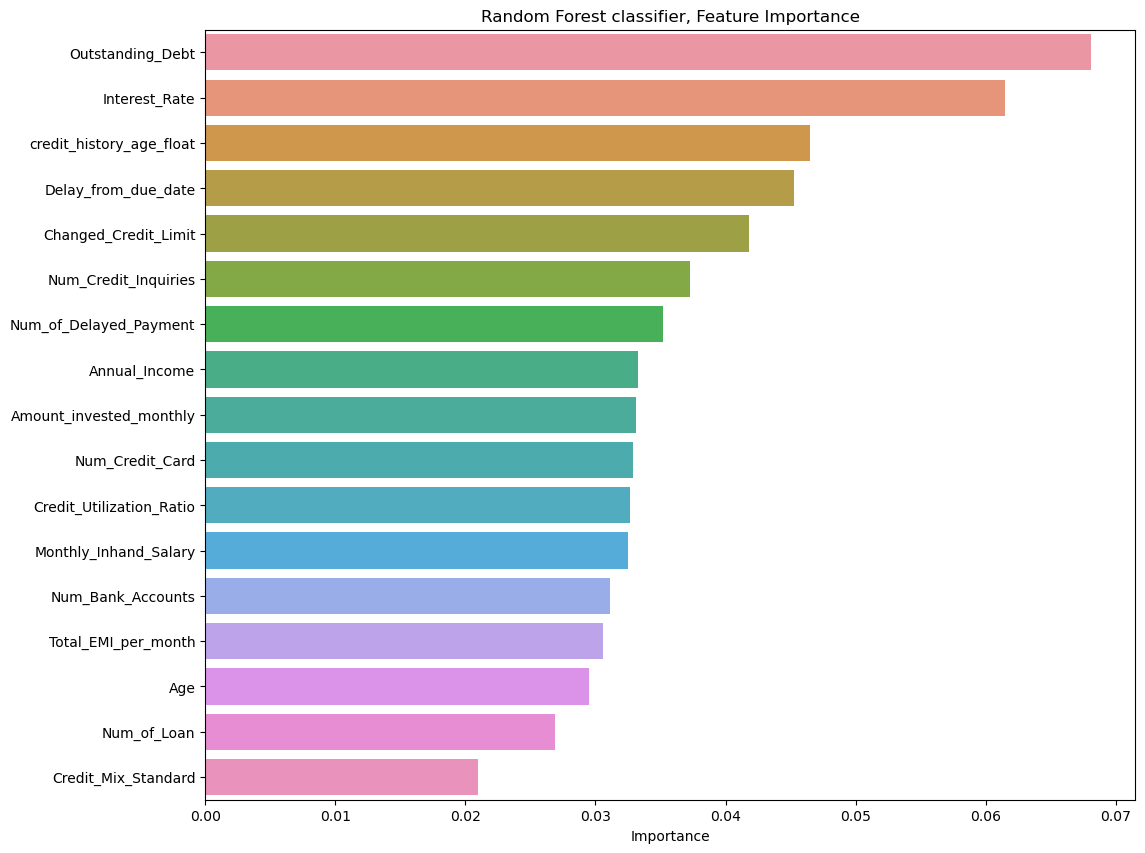

In [141]:
# Top 3 predictor of Customer's credit score: 'Outstanding Debt', 'Interest_rate', 'credit_history_age_float'
# to visualise Random Forest variable importance in a barplot.
# the Random Forest Classifier model = 77% accurate
plt.figure(figsize=(12,10), dpi=100)
sns.barplot(data=rf_imp, x='Importance', y=rf_imp.index)
plt.title('Random Forest classifier, Feature Importance');